# Факторный анализ

Факторный анализ - это статистический метод, который используется для выявления скрытых (или латентных) факторов в наборе данных. Проще говоря, этот метод помогает найти скрытые отношения между переменными, выделяя общие факторы, которые могут объяснить вариацию данных.

Представь себе, что у тебя есть группа различных измерений или вопросов, и ты хочешь понять, существуют ли какие-то подлежащие факторы, объединяющие эти измерения. Факторный анализ позволяет упростить сложные данные, сделав их более понятными и управляемыми.

### Процесс

1. **Сбор данных:** Сначала необходимо собрать данные по множеству переменных. Это могут быть результаты опросов, тестов или любые другие измерения.
</br>

2. **Матрица корреляции:** Далее создается матрица корреляции между всеми парами переменных. Эта матрица показывает, насколько каждая переменная коррелирует с другими.
</br>

3. **Извлечение факторов:** Затем начинается процесс извлечения факторов. Одним из популярных методов является метод главных компонент (Principal Component Analysis, PCA). Этот метод позволяет выделить несколько факторов, которые объясняют наибольшую долю общей дисперсии в данных.
</br>

4. **Ротация:** Часто после извлечения факторов применяется ротация (например, варимакс-ротация), чтобы упростить интерпретацию факторов. Ротация помогает сделать факторы более раздельными и ярко выраженными.
</br>

5. **Интерпретация:** После ротации получаются факторы, которые можно интерпретировать. Каждый фактор представляет собой скрытую переменную, которая объясняет общие источники вариации в исходных переменных. Обычно факторы интерпретируют на основе их нагрузок (коэффициентов), которые показывают, насколько каждая исходная переменная связана с данным фактором.
</br>

6. **Создание факторов:** В заключение можно создать новые переменные, которые основаны на идентифицированных факторах. Эти новые переменные можно использовать в дальнейшем анализе для упрощения и лучшего понимания данных.

### Матрица корреляции

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

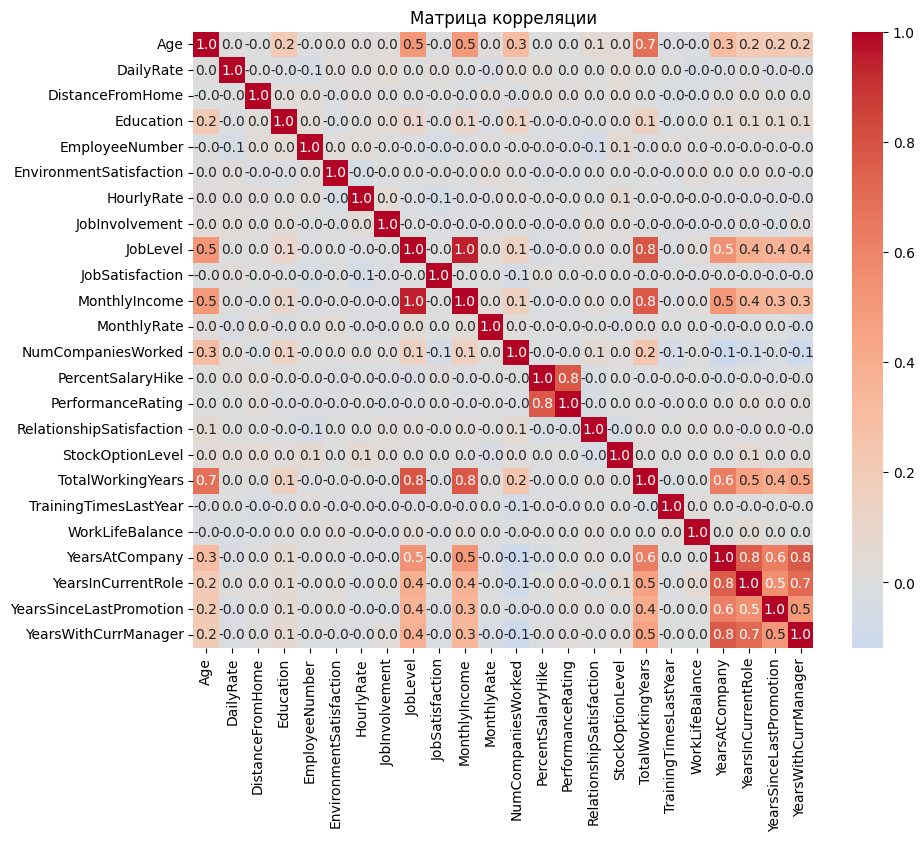

'Age': KMO = 0.8151 (Отлично)
'DailyRate': KMO = 0.4265 (Недопустимо)
'DistanceFromHome': KMO = 0.3681 (Недопустимо)
'Education': KMO = 0.7943 (Хорошо)
'EmployeeNumber': KMO = 0.5273 (Плохо)
'EnvironmentSatisfaction': KMO = 0.4819 (Недопустимо)
'HourlyRate': KMO = 0.5171 (Плохо)
'JobInvolvement': KMO = 0.4602 (Недопустимо)
'JobLevel': KMO = 0.7585 (Хорошо)
'JobSatisfaction': KMO = 0.4637 (Недопустимо)
'MonthlyIncome': KMO = 0.7497 (Хорошо)
'MonthlyRate': KMO = 0.5644 (Плохо)
'NumCompaniesWorked': KMO = 0.6692 (Средне)
'PercentSalaryHike': KMO = 0.5009 (Плохо)
'PerformanceRating': KMO = 0.5003 (Плохо)
'RelationshipSatisfaction': KMO = 0.4971 (Недопустимо)
'StockOptionLevel': KMO = 0.5022 (Плохо)
'TotalWorkingYears': KMO = 0.8612 (Отлично)
'TrainingTimesLastYear': KMO = 0.5299 (Плохо)
'WorkLifeBalance': KMO = 0.4164 (Недопустимо)
'YearsAtCompany': KMO = 0.8306 (Отлично)
'YearsInCurrentRole': KMO = 0.8823 (Отлично)
'YearsSinceLastPromotion': KMO = 0.9327 (Отлично)
'YearsWithCurrManager': 

In [2]:
# Загрузка данных
# Ссылка: https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors/data
df = pd.read_csv('../datasets/hr_analytics.csv')

# Выбор только числовых данных (int, float)
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Удаление столбцов с нулевой дисперсией
df_numeric = df_numeric.loc[:, df_numeric.var() > 0.0]

# Сокращение названий переменных до первых 25 символов
df_numeric_short = df_numeric.copy()
df_numeric_short.columns = [col[:25] for col in df_numeric.columns]

# Вычисление матрицы корреляций
correlation_matrix = df_numeric_short.corr()

# Визуализация матрицы корреляций с округлением до одного символа после запятой
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', center=0)
plt.title('Матрица корреляции')
plt.show()

# Подсчёт KMO и тест сферичности Бартлетта
kmo_all, kmo_model = calculate_kmo(df_numeric_short)
chi_square_value, p_value = calculate_bartlett_sphericity(df_numeric_short)

def interpret_kmo(kmo_all, kmo_model, column_names):
    interpretation = []
    for kmo, name in zip(kmo_all, column_names):
        if kmo >= 0.8:
            quality = "Отлично"
        elif kmo >= 0.7:
            quality = "Хорошо"
        elif kmo >= 0.6:
            quality = "Средне"
        elif kmo >= 0.5:
            quality = "Плохо"
        else:
            quality = "Недопустимо"
        interpretation.append(f"'{name}': KMO = {kmo:.4f} ({quality})")
    
    overall_quality = "Отлично" if kmo_model >= 0.8 else "Хорошо" if kmo_model >= 0.7 else "Средне" if kmo_model >= 0.6 else "Плохо" if kmo_model >= 0.5 else "Недопустимо"
    interpretation.append(f"Общая модель: KMO = {kmo_model:.4f} ({overall_quality})")
    
    return "\n".join(interpretation)

def interpret_bartlett(chi_square_value, p_value):
    if p_value < 0.05:
        return f"Тест сферичности Бартлетта: статистика хи-квадрат = {chi_square_value:.4f}, p-значение = {p_value:.4g} (корреляционная матрица значимо отличается от единичной; данные пригодны для факторного анализа)"
    else:
        return f"Тест сферичности Бартлетта: статистика хи-квадрат = {chi_square_value:.4f}, p-значение = {p_value:.4g} (нет достаточных доказательств, что корреляционная матрица отличается от единичной; данные могут быть не пригодны для факторного анализа)"

# Интерпретация результатов
column_names = df_numeric_short.columns
kmo_interpretation = interpret_kmo(kmo_all, kmo_model, column_names)
bartlett_interpretation = interpret_bartlett(chi_square_value, p_value)

print(kmo_interpretation)
print(bartlett_interpretation)

### Факторный анализ

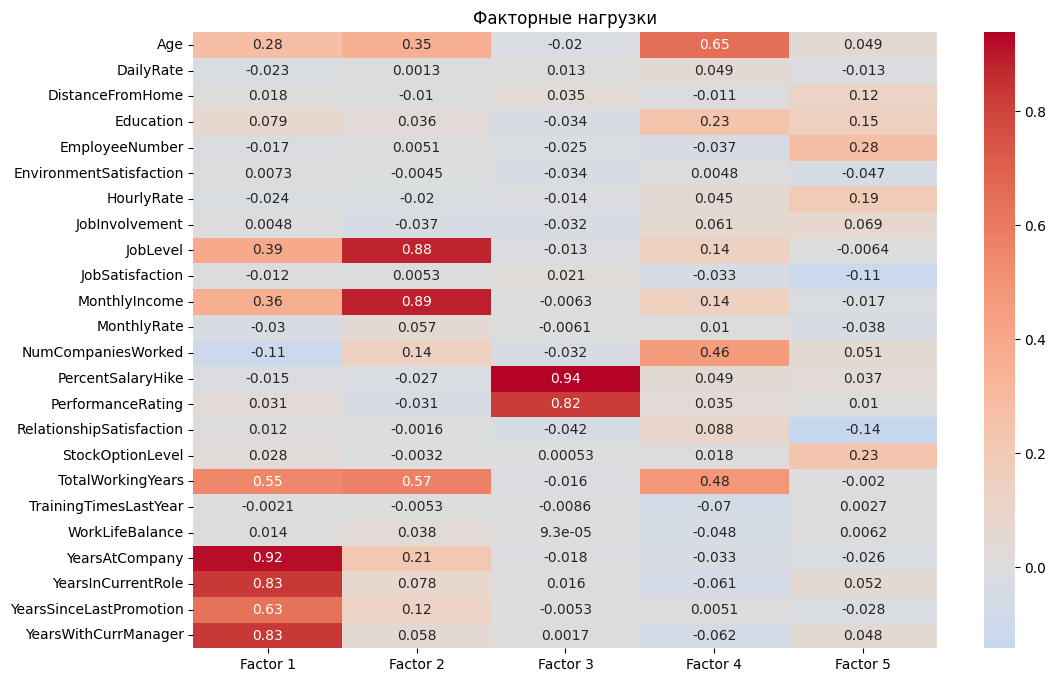


Фактор 1 наиболее сильно связан с переменными: YearsAtCompany (загрузка 0.92), YearsInCurrentRole (загрузка 0.83), YearsWithCurrManager (загрузка 0.83).

Фактор 2 наиболее сильно связан с переменными: MonthlyIncome (загрузка 0.89), JobLevel (загрузка 0.88), TotalWorkingYears (загрузка 0.57).

Фактор 3 наиболее сильно связан с переменными: PercentSalaryHike (загрузка 0.94), PerformanceRating (загрузка 0.82), RelationshipSatisfaction (загрузка 0.04).

Фактор 4 наиболее сильно связан с переменными: Age (загрузка 0.65), TotalWorkingYears (загрузка 0.48), NumCompaniesWorked (загрузка 0.46).

Фактор 5 наиболее сильно связан с переменными: EmployeeNumber (загрузка 0.28), StockOptionLevel (загрузка 0.23), HourlyRate (загрузка 0.19).


In [3]:
fa = FactorAnalyzer(n_factors=5, rotation='varimax')
fa.fit(df_numeric_short)

# Получение результирующих нагрузок
loadings = fa.loadings_

# Формирование DataFrame для более удобного просмотра
loadings_df = pd.DataFrame(loadings, index=df_numeric_short.columns, columns=[f'Factor {i+1}' for i in range(loadings.shape[1])])

# Визуализация нагрузки факторов
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('Факторные нагрузки')
plt.show()

# Интерпретация факторов
def interpret_factors(loadings_df):
    interpretation = []
    for factor in loadings_df.columns:
        sorted_loadings = loadings_df[factor].abs().sort_values(ascending=False)
        top_features = sorted_loadings.index[:3].tolist()  # Три переменные с наибольшей нагрузкой
        top_loadings = sorted_loadings.values[:3].tolist()
        interpretation.append(f"\nФактор {factor[-1]} наиболее сильно связан с переменными: "
                              f"{', '.join([f'{name} (загрузка {loading:.2f})' for name, loading in zip(top_features,top_loadings)])}.")
    return "\n".join(interpretation)

factors_interpretation = interpret_factors(loadings_df)
print(factors_interpretation)